In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (3, 7). You can assume the start point to be (2, 5). Plot the function and its contours along with the minimum value in that direction. Is the search direction a gradient descent one? Comment on that as well.

Yeah the search direction is a part of gradient descent because it moves towards the final lowest value here. So it would be a part of gradient descent one

0.9595959595959596
[ 5.05175781 12.12076823]


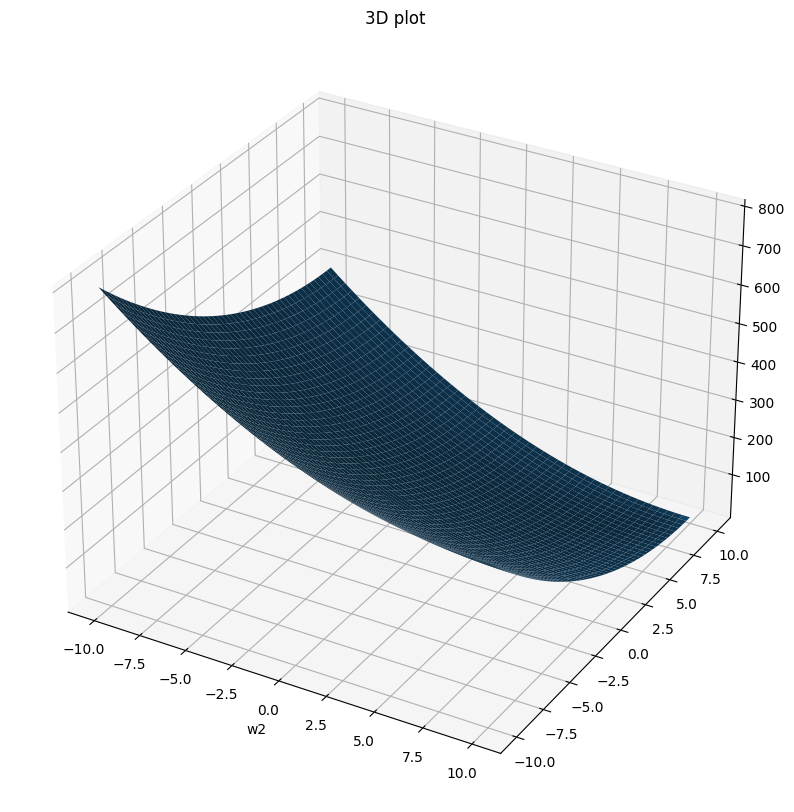

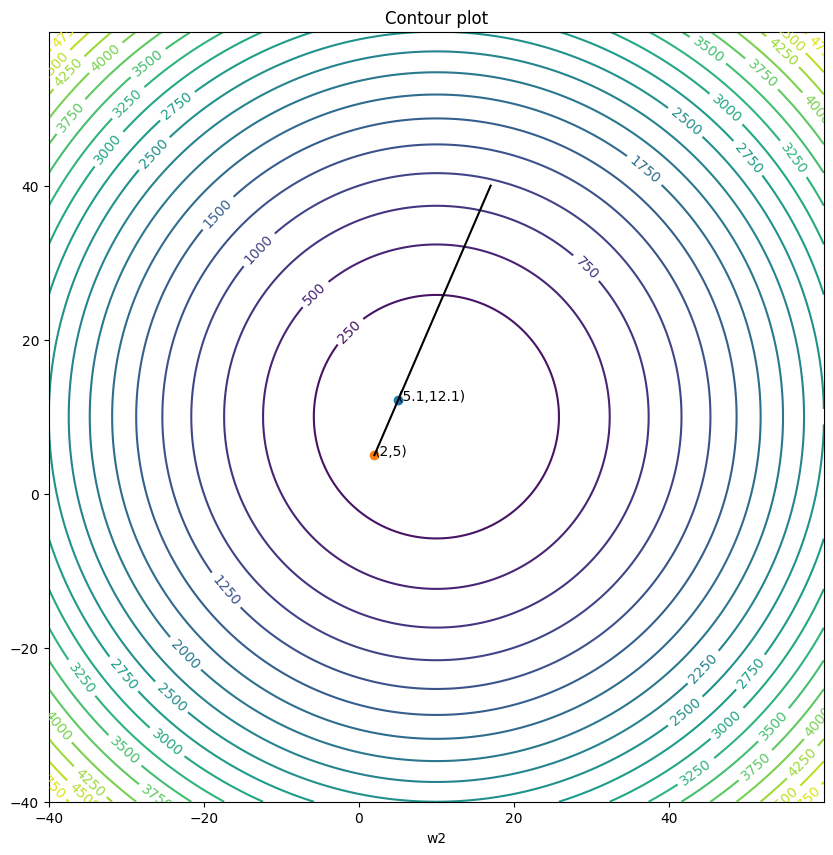

In [2]:
def Q1(w):
    return (w[0]-10)**2+(w[1]-10)**2
ALPHA = 0

class Multivariate_Optimization:
    def __init__(self,start,direction,range):
        self.start=np.array(start)
        self.direction=np.array(direction)
        self.range=range
    
    def bracketing(self,N,fn):
        for i in range(N-2):
            if fn(self.w_all[i]) >= fn(self.w_all[i+1]) <= fn(self.w_all[i+2]):
                return np.array([self.w_all[i],self.w_all[i+2]]),i
        if fn(self.w_all[0]) > fn(self.w_all[-1]):
            print(f"Highest Value at {self.w_all[0]}")
            return self.w_all[0]
        else:
            print(f"Highest Value at {self.w_all[-1]}")
            return self.w_all[-1]

    def region_elimination(self, range, e, fn):
        a= range[0]
        b= range[1]
        #print(a,b)
        #print((a-b)/4)
        L = (b-a)/4
        #print(f"L:{L}")

        if abs(np.average(L))<e:
            return (a+b)/2
        
        wm = (a+b)/2

        w1 = a + L
        w2 = b - L
        
        #print(f"w1:{w1}\nw2:{w2}\nwm:{wm}")

        if fn(w1) < fn(wm):
            return self.region_elimination(np.array([a, wm]), e, fn)
        elif fn(w2) < fn(wm):
            return self.region_elimination(np.array([wm, b]), e, fn)
        else:
            return self.region_elimination(np.array([w1,w2]), e, fn)

    def line_search(self,N,e,fn):
        self.alpha = np.linspace(0,self.range,N)
        self.w_all=[]
        for i in self.alpha:
            self.w = self.start+self.direction*i
            self.w_all+=[list(self.w)]
        self.w_all=np.array(self.w_all)
        #print(self.w_all)
        if len(self.bracketing(N,fn))==2:
            new_value, i = self.bracketing(N,fn)
            #print(new_value)
            min_value = self.region_elimination(new_value, e, fn)
            self.plotting(min_value,self.start,fn=fn)
            return min_value,self.alpha[i]
        else:
            return self.bracketing(N,fn)
    
    def line_search_Salpha(self,N,e,fn,alp):
        
        new_val = self.start+self.direction*alp
        
        self.plotting(new_val,self.start,fn=fn)
        return new_val
        
        
    def plotting(self,*args,fn):

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        x=np.arange(-10,10,0.01)
        y=np.arange(-10,10,0.01)
        X,Y=np.meshgrid(np.arange(-40,60,0.01),np.arange(-40,60,0.01))
        Z= fn((X,Y))
        c=ax.contour(X,Y,Z, levels=20)
        ax.clabel(c)
        for i in args:
            ax.plot(i[0],i[1],'o')
            ax.text(i[0],i[1],f"({round(i[0],1)},{round(i[1],1)})")
            ax.set_title("Contour plot")
            ax.set_xlabel("w1")
            ax.set_xlabel("w2")
        X1,Y1=self.w_all[0][0],self.w_all[0][1]
        X2,Y2=self.w_all[-1][0],self.w_all[-1][1]

        ax.plot((X1,X2),(Y1,Y2),color='black')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
x=np.arange(-10,10,0.01)
y=np.arange(-10,10,0.01)
X,Y=np.meshgrid(x,y)
ax.plot_surface(X,Y,Q1((X,Y)))
ax.set_title("3D plot")
ax.set_xlabel("w1")
ax.set_xlabel("w2")

J1=Multivariate_Optimization((2,5),(3,7),5)
min_J1, ALPHA = J1.line_search(100, 0.0001, Q1)
print(ALPHA)
print(min_J1)
#J1.plotting(min_J1,fn=Q1)
#print(min_J1)

# 2. Using steepest gradient descent, find the local minimum for the function in the problem 1 (i.e. J(w1, w2) = (w1 - 10 )^2 + (w2 - 10)^2). While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show the minimal point in that direction. 

IMP NOTE: Plan your coding in such a way so that you can reuse them (use classes / functions). For example, code developed for problem 1 can be used to solve part of problem 2. Similarly, when you do the problems in ML, both multivariable and single variable optimization play greater role. You can use most of the code that you write today to do the problems in the coming weeks. 

In [3]:
def grad_Q1_w1(w):
    return 2*(w[0]-10)
def grad_Q1_w2(w):
    return 2*(w[1]-10)


Gradient:[9.896484375, -4.241536458333332]
Minimum Value in this iteration:[ 5.05175781 12.12076823]
Gradient:[-0.00039048628373450356, 0.0001673586039387942]
Minimum Value in this iteration:[10.00019524  9.99991632]


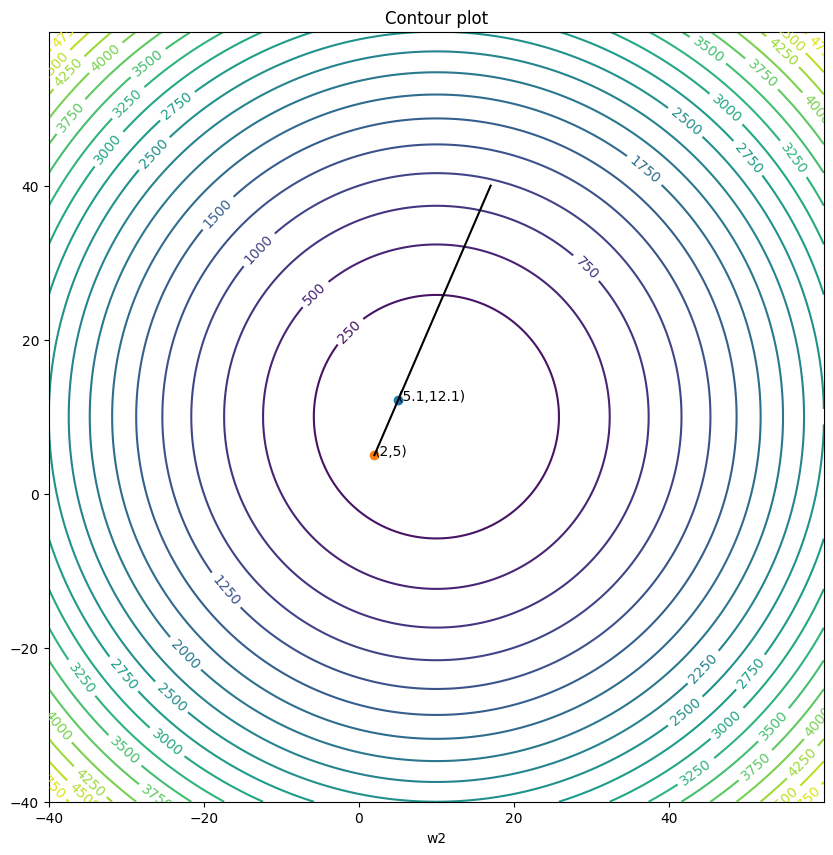

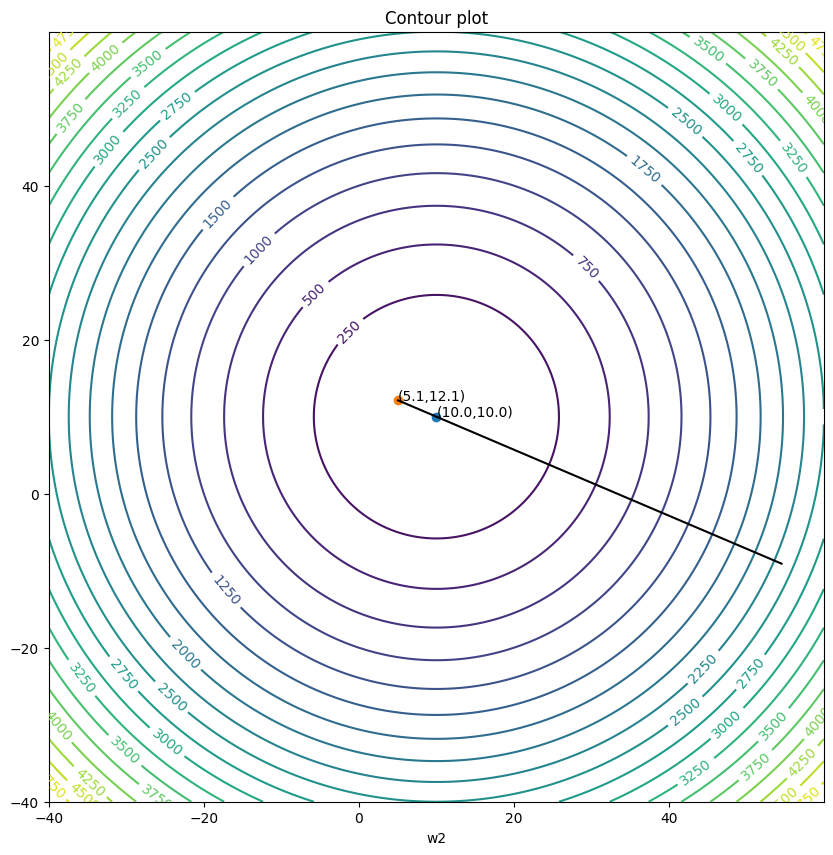

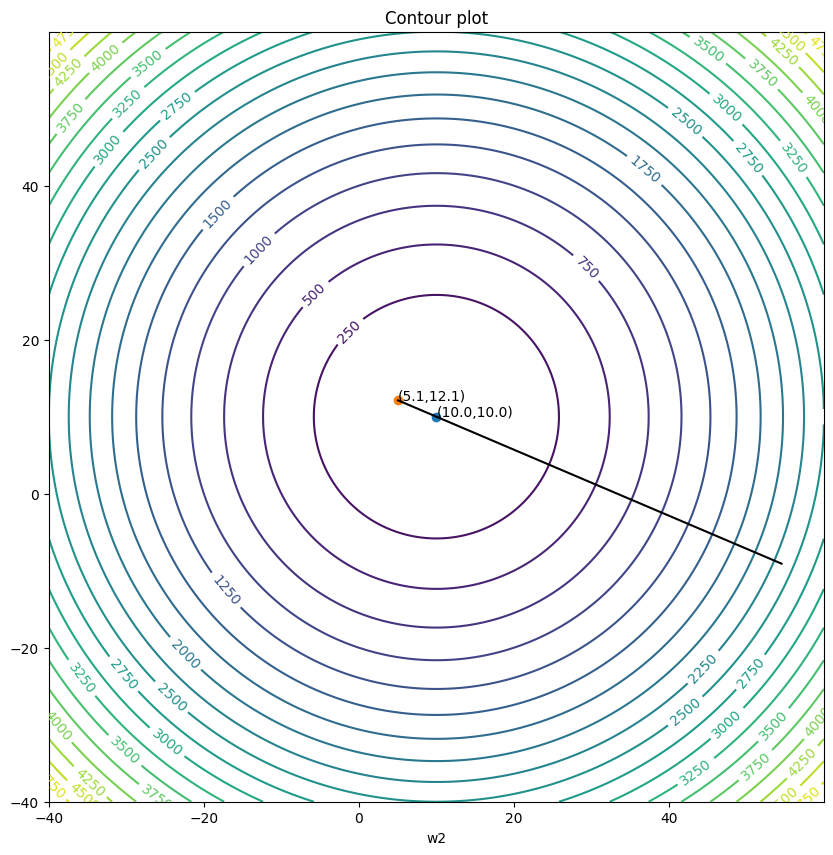

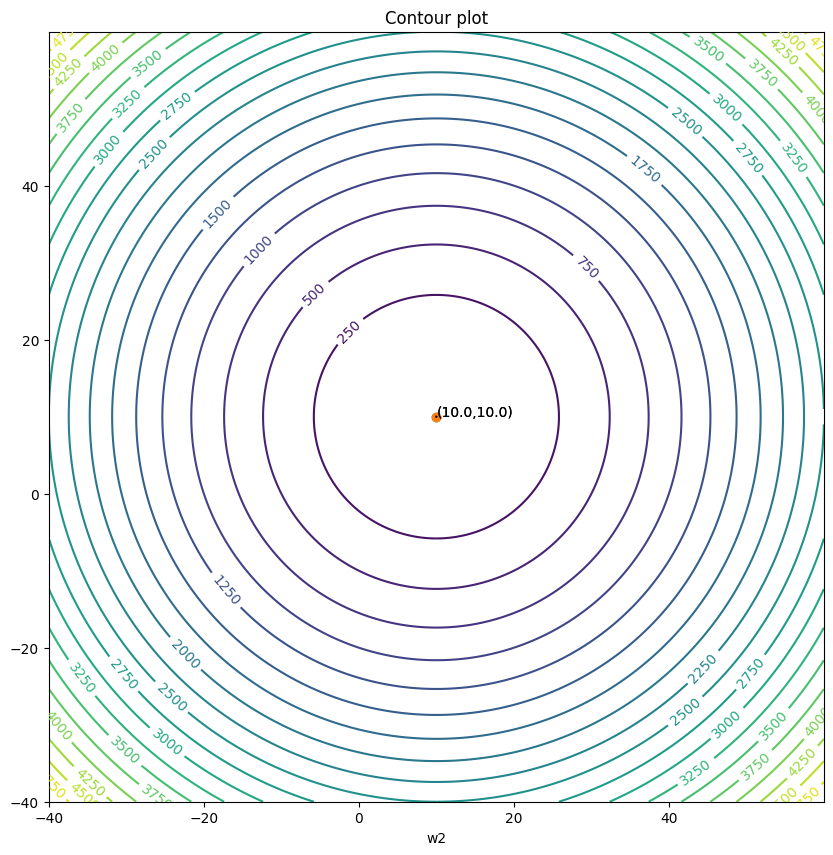

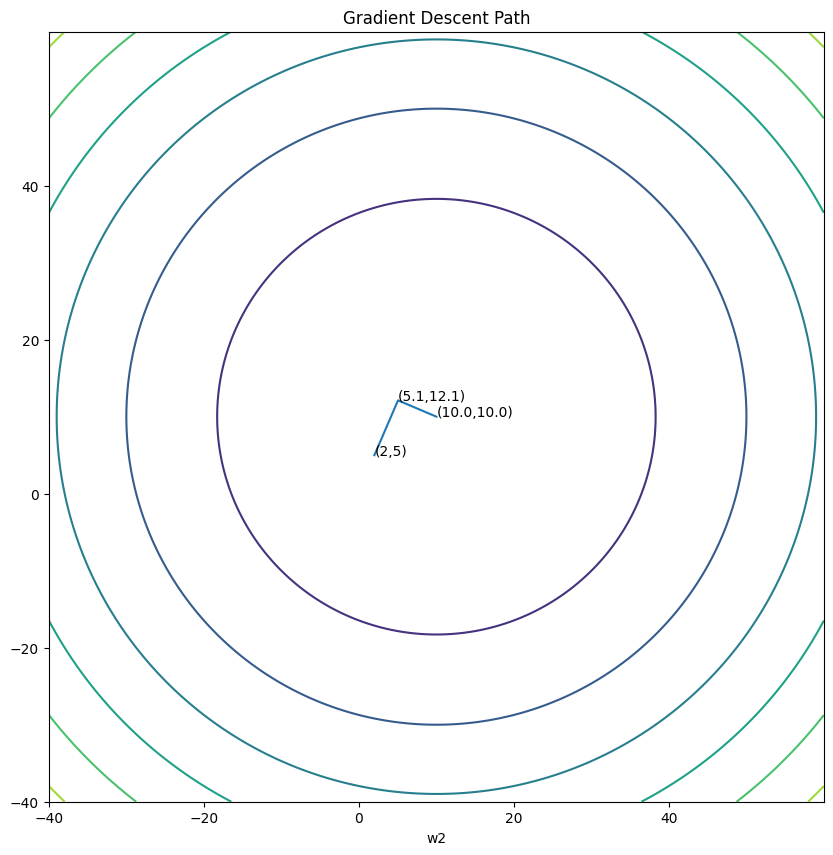

In [4]:
def grad_Q1_w1(w):
    return 2*(w[0]-10)
def grad_Q1_w2(w):
    return 2*(w[1]-10)
def steepest_grad_descent_calpha(J,e,G=[],M=[]):
    min_J= J.line_search(100, 0.0001, Q1)[0]
    M+=[np.ndarray.tolist(min_J)]
    gradient = [-grad_Q1_w1(min_J), -grad_Q1_w2(min_J)]
    G+=[gradient]
    print(f"Gradient:{gradient}")
    print(f"Minimum Value in this iteration:{min_J}")
    J1=Multivariate_Optimization(min_J,gradient,5)
    min_J1 = J1.line_search(100,0.0001,Q1)[0]
    if np.linalg.norm(gradient) < e:
        return min_J1,G,M 
    return steepest_grad_descent_calpha(J1,e,G,M)


J1=Multivariate_Optimization((2,5),(3,7),5)

A,B,C=steepest_grad_descent_calpha(J1,0.001,M=[(2,5)])
for i in C:
    i=list(i)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
x=np.arange(-40,60,0.01)
y=np.arange(-40,60,0.01)
X,Y=np.meshgrid(x,y)
ax.contour(X,Y,Q1((X,Y)))
ax.plot(*zip(*C))
ax.set_title("Gradient Descent Path")
ax.set_xlabel("w1")
ax.set_xlabel("w2")
for i in C:
    ax.text(i[0],i[1],f"({round(i[0],1)},{round(i[1],1)})")


#plt.plot()
#print(A,B,C)'''

0.9595959595959596
Point: [10.00041842 10.00026151]
118


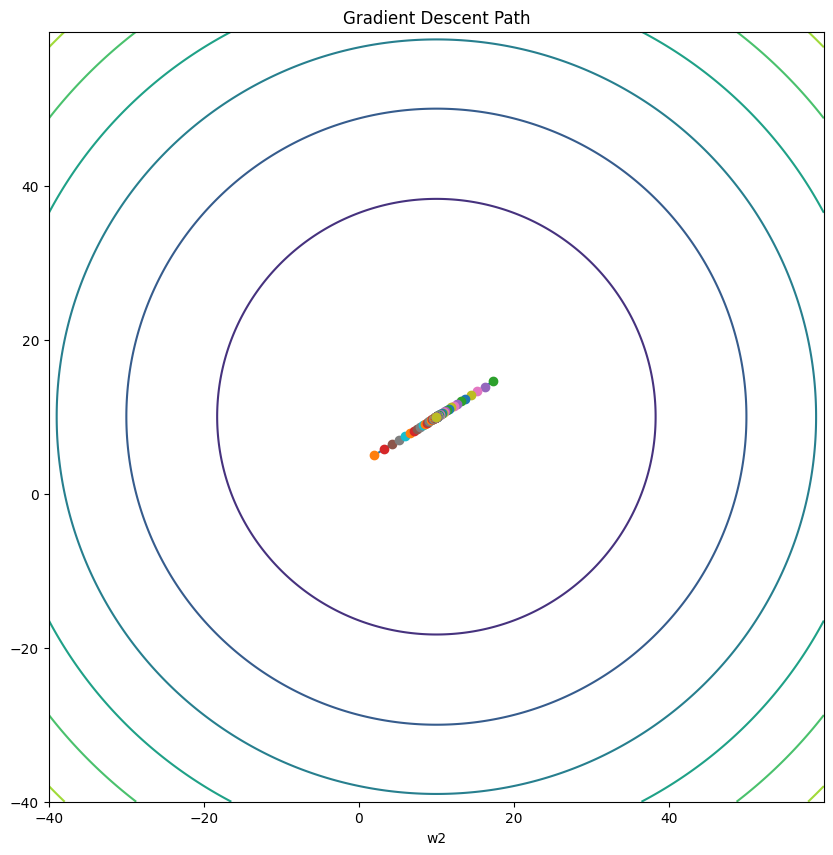

In [5]:
def steepest_grad_descent_Salpha(J,e,alpha,G=[],M=[]):
    point=np.array(J.start)
    M+=[point]
    gradient = [-grad_Q1_w1(point), -grad_Q1_w2(point)]
    gradient = np.array(gradient)
    #print(np.linalg.norm(gradient) )
    while np.linalg.norm(gradient) > e:
        point=point+alpha*gradient
        gradient = np.array([-grad_Q1_w1(point), -grad_Q1_w2(point)])
        M+=[point]
    return point,G,M

J1=Multivariate_Optimization((2,5),(3,7),5)
print(ALPHA)
A,B,C=steepest_grad_descent_Salpha(J1,0.001,ALPHA,M=[])
print("Point:",A)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
x=np.arange(-40,60,0.01)
y=np.arange(-40,60,0.01)
X,Y=np.meshgrid(x,y)
ax.contour(X,Y,Q1((X,Y)))
ax.plot(*zip(*C))
ax.set_title("Gradient Descent Path")
ax.set_xlabel("w1")
ax.set_xlabel("w2")
print(len(C))
for i in C:
    ax.plot(i[0],i[1],'o')
    #ax.text(i[0],i[1],f"({round(i[0],1)},{round(i[1],1)})")